I. Import Pustaka (Library) Python

Exploratory Data Analysis (EDA) & Visualisasi Data

In [319]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils import resample
from scipy.sparse import hstack
from datetime import datetime
import joblib

II. Load Dataset

In [320]:
df = pd.read_csv("data/tiktok_scrapper.csv")

df.head()

,authorMeta.avatar,authorMeta.name,text,diggCount,shareCount,playCount,commentCount,videoMeta.duration,musicMeta.musicName,musicMeta.musicAuthor,musicMeta.musicOriginal,createTimeISO,webVideoUrl
0,https://p16-common-sign-sg.tiktokcdn-us.com/to...,fransmashurtam,RESTORANT FISH &CHEAP POINSQUER LEBAK BULUS JA...,37,0,217,1,115,suara asli - FRANS MASHUR TAM,FRANS MASHUR TAM,True,2025-04-23T11:44:50.000Z,https://www.tiktok.com/@fransmashurtam/video/7...
1,https://p16-common-sign-useast2a.tiktokcdn-us....,noona_rosa,Yedeura~ cempedak goreng enak bangettt sama ko...,8381,93,119100,55,89,오리지널 사운드 - Noona Rosa🇰🇷🇮🇩,Noona Rosa🇰🇷🇮🇩,True,2025-04-23T10:22:45.000Z,https://www.tiktok.com/@noona_rosa/video/74964...
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,soberbites,GOURMET SAUSAGE TEPI JALAN 🔥 📍Sober Bites Bert...,279,54,11700,7,23,original sound,MelodyScript 🎵,True,2025-04-22T05:57:47.000Z,https://www.tiktok.com/@soberbites/video/74960...
3,https://p16-common-sign-sg.tiktokcdn-us.com/to...,vinc.eats,Replying to @dillahgz makan aneka eskrim🍦🍦🍦 en...,468,8,10100,52,54,Mozart Minuet with violin(815356),松本一策,False,2025-04-23T11:08:40.000Z,https://www.tiktok.com/@vinc.eats/video/749646...
4,https://p16-common-sign-va.tiktokcdn-us.com/to...,bebbyrere28,"tiba tiba banget dikirimin sama adekku,mana ba...",64,3,1366,1,348,suara asli - BebbyReree28,BebbyReree28,True,2025-04-23T10:47:40.000Z,https://www.tiktok.com/@bebbyrere28/video/7496...


III. Memeriksa Struktur & Tipe Data

In [321]:
#untuk mengetahui ukuran data (jumlah baris dan kolom)
df.shape

(346, 13)

In [322]:
#untuk mengetahui informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   authorMeta.avatar        346 non-null    object
 1   authorMeta.name          346 non-null    object
 2   text                     336 non-null    object
 3   diggCount                346 non-null    int64 
 4   shareCount               346 non-null    int64 
 5   playCount                346 non-null    int64 
 6   commentCount             346 non-null    int64 
 7   videoMeta.duration       346 non-null    int64 
 8   musicMeta.musicName      346 non-null    object
 9   musicMeta.musicAuthor    344 non-null    object
 10  musicMeta.musicOriginal  346 non-null    bool  
 11  createTimeISO            346 non-null    object
 12  webVideoUrl              346 non-null    object
dtypes: bool(1), int64(5), object(7)
memory usage: 32.9+ KB


In [323]:
# Mengecek missing value 
df.isnull().sum()

authorMeta.avatar           0
authorMeta.name             0
text                       10
diggCount                   0
shareCount                  0
playCount                   0
commentCount                0
videoMeta.duration          0
musicMeta.musicName         0
musicMeta.musicAuthor       2
musicMeta.musicOriginal     0
createTimeISO               0
webVideoUrl                 0
dtype: int64

IV. Pembersihan & Pra Pemrosesan Data

In [324]:
# Mengecek missing value (NaN)
df.isnull().sum()

authorMeta.avatar           0
authorMeta.name             0
text                       10
diggCount                   0
shareCount                  0
playCount                   0
commentCount                0
videoMeta.duration          0
musicMeta.musicName         0
musicMeta.musicAuthor       2
musicMeta.musicOriginal     0
createTimeISO               0
webVideoUrl                 0
dtype: int64

In [325]:
#Hapus Missing Value (NaN)
df.dropna(inplace=True)

df.isnull().sum()

authorMeta.avatar          0
authorMeta.name            0
text                       0
diggCount                  0
shareCount                 0
playCount                  0
commentCount               0
videoMeta.duration         0
musicMeta.musicName        0
musicMeta.musicAuthor      0
musicMeta.musicOriginal    0
createTimeISO              0
webVideoUrl                0
dtype: int64

In [326]:
# Encoding Variabel Kategorikal
le_name = LabelEncoder()
df['authorMeta.name_encoded'] = le_name.fit_transform(df['authorMeta.name'])
le_music = LabelEncoder()
df['musicMeta.musicName_encoded'] = le_music.fit_transform(df['musicMeta.musicName'])

In [327]:
# Feature Engineering
df['text_length'] = df['text'].apply(len)
# Ekstraksi hashtag dari kolom 'text'
df['hashtags_str'] = df['text'].apply(lambda x: ' '.join(re.findall(r"#\w+", str(x))))

# Konversi kolom waktu
df['createTimeISO'] = pd.to_datetime(df['createTimeISO'])
df['hour'] = df['createTimeISO'].dt.hour
df['minute'] = df['createTimeISO'].dt.minute
df['second'] = df['createTimeISO'].dt.second
df['day'] = df['createTimeISO'].dt.dayofweek 

# Total interaksi dan label popularitas
df['total_interactions'] = (df['diggCount'] + df['shareCount'] + 
                            df['commentCount'] + df['playCount'])
df['is_popular'] = (df['total_interactions'] >= 5000000).astype(int)

# TF-IDF vectorizer untuk hashtag
tfidf = TfidfVectorizer(max_features=100) 
hashtag_tfidf = tfidf.fit_transform(df['hashtags_str'])

day_df = df.groupby(['day', 'is_popular']).size().unstack(fill_value=0)

# Mapping angka hari ke Bahasa Indonesia
mapping_hari = {
    0: 'Senin', 1: 'Selasa', 2: 'Rabu', 
    3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'
}
day_df.index = day_df.index.map(mapping_hari)
ordered_days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
day_df = day_df.reindex(ordered_days)

In [328]:
#analisis statistik deskriptif
df.describe()

,diggCount,shareCount,playCount,commentCount,videoMeta.duration,authorMeta.name_encoded,musicMeta.musicName_encoded,text_length,hour,minute,second,day,total_interactions,is_popular
count,3.350000e+02,3.350000e+02,3.350000e+02,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,3.350000e+02,335.000000
mean,1.294509e+06,1.618692e+05,1.460136e+07,8925.340299,44.558209,136.988060,101.465672,128.352239,11.304478,30.758209,28.608955,2.567164,1.606666e+07,0.641791
std,2.162544e+06,5.077934e+05,2.384310e+07,17773.020858,60.855296,75.940411,46.132112,141.086889,5.585198,17.584647,17.503103,1.735711,2.579681e+07,0.480191
min,1.000000e+01,0.000000e+00,2.170000e+02,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.550000e+02,0.000000
25%,1.481500e+03,4.750000e+01,2.855000e+04,46.500000,13.000000,71.500000,71.500000,60.000000,8.000000,16.000000,13.000000,1.000000,3.007350e+04,0.000000
50%,2.257000e+05,6.189000e+03,4.500000e+06,1631.000000,20.000000,140.000000,101.000000,98.000000,11.000000,31.000000,27.000000,2.000000,4.837981e+06,1.000000
75%,2.000000e+06,9.075000e+04,1.975000e+07,9200.500000,59.500000,209.000000,127.000000,150.000000,14.000000,47.000000,43.500000,4.000000,2.244238e+07,1.000000
max,1.880000e+07,5.200000e+06,1.845000e+08,140400.000000,539.000000,263.000000,184.000000,1443.000000,23.000000,59.000000,59.000000,6.000000,1.894434e+08,1.000000


V. Visualisasi Data

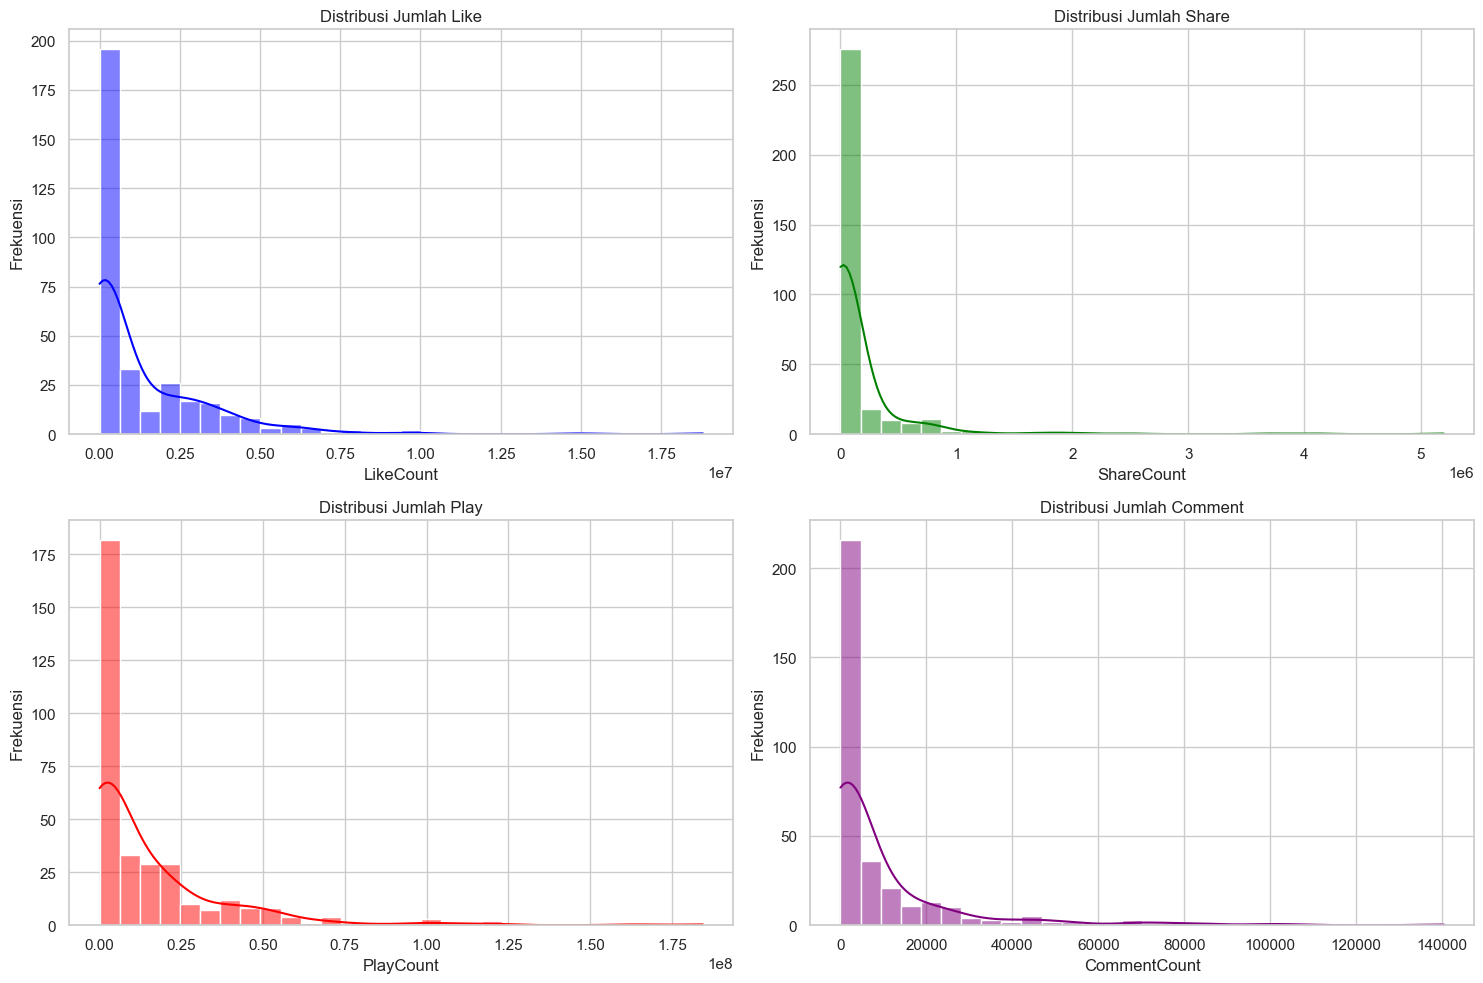

In [329]:
#Visualisasi kolom numerik

# Set style plot
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

# Plot Digg Count
plt.subplot(2, 2, 1)  # Menentukan baris ke-2 dan kolom ke-2 pada grid 2x2
sns.histplot(df['diggCount'], kde=True, color='blue', bins=30)
plt.title('Distribusi Jumlah Like')
plt.xlabel('LikeCount')
plt.ylabel('Frekuensi')

# Plot Share Count
plt.subplot(2, 2, 2)
sns.histplot(df['shareCount'], kde=True, color='green', bins=30)
plt.title('Distribusi Jumlah Share')
plt.xlabel('ShareCount')
plt.ylabel('Frekuensi')

# Plot Play Count
plt.subplot(2, 2, 3)
sns.histplot(df['playCount'], kde=True, color='red', bins=30)
plt.title('Distribusi Jumlah Play')
plt.xlabel('PlayCount')
plt.ylabel('Frekuensi')

# Plot Comment Count
plt.subplot(2, 2, 4)
sns.histplot(df['commentCount'], kde=True, color='purple', bins=30)
plt.title('Distribusi Jumlah Comment')
plt.xlabel('CommentCount')
plt.ylabel('Frekuensi')

# Menampilkan plot 
plt.tight_layout()  
plt.show()

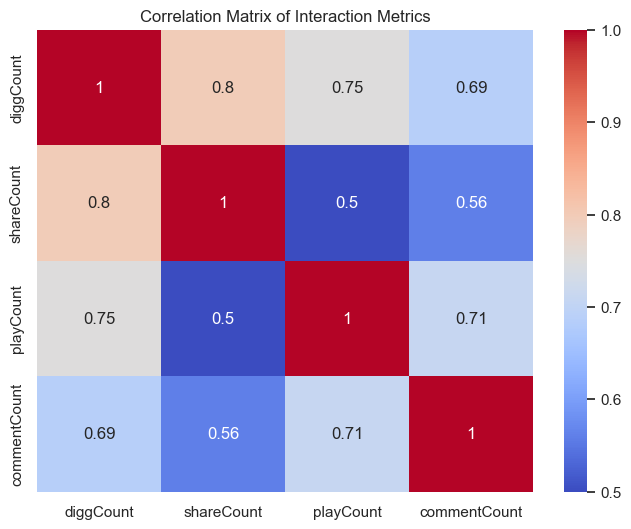

In [330]:
# Visualisasi Korelasi Menggunakan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['diggCount', 'shareCount', 'playCount', 'commentCount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Interaction Metrics')
plt.show()

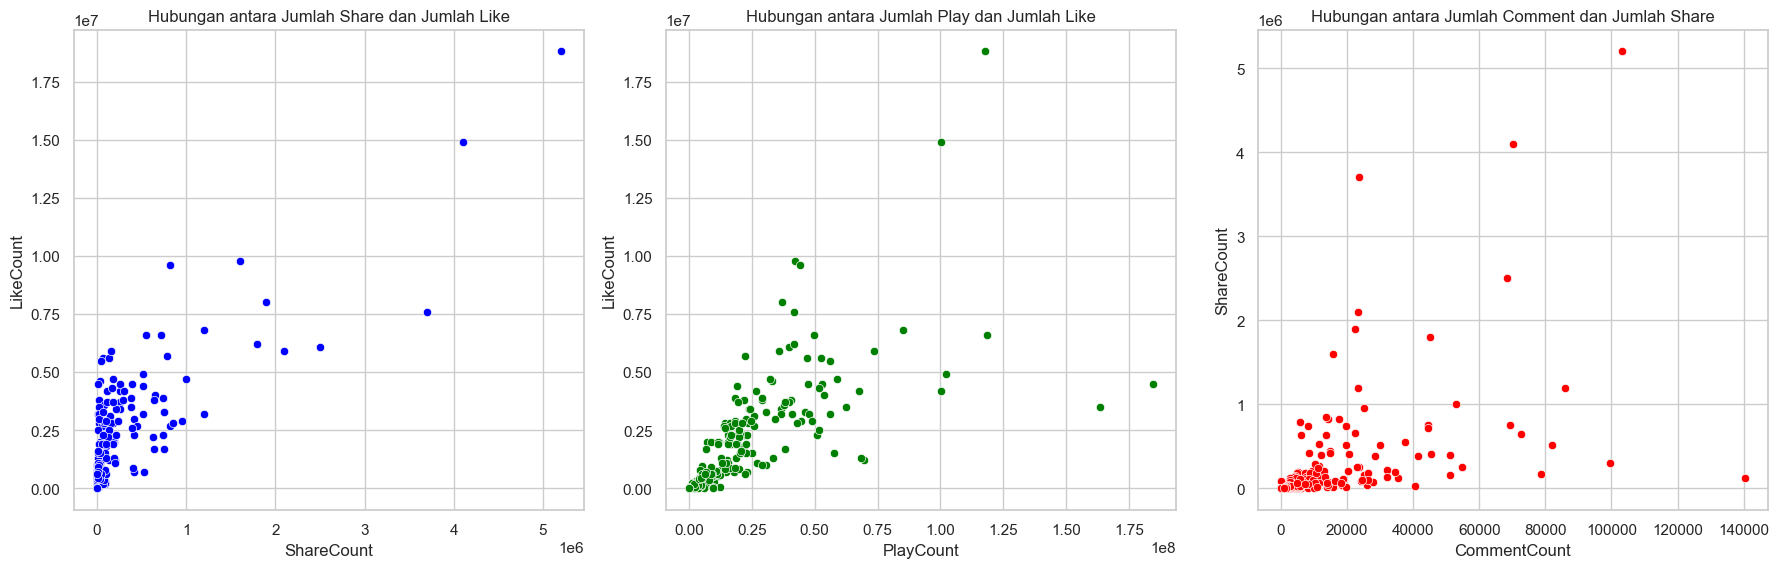

In [331]:
#Visualisasi Hubungan Antar Fitur Menggunakan Scatter Plot

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualisasi hubungan antara Share Count dan Digg Count
sns.scatterplot(x='shareCount', y='diggCount', data=df, color='blue', ax=axes[0])
axes[0].set_title('Hubungan antara Jumlah Share dan Jumlah Like')
axes[0].set_xlabel('ShareCount')
axes[0].set_ylabel('LikeCount')

# Visualisasi hubungan antara Play Count dan Digg Count
sns.scatterplot(x='playCount', y='diggCount', data=df, color='green', ax=axes[1])
axes[1].set_title('Hubungan antara Jumlah Play dan Jumlah Like')
axes[1].set_xlabel('PlayCount')
axes[1].set_ylabel('LikeCount')

# Visualisasi hubungan antara Comment Count dan Share Count
sns.scatterplot(x='commentCount', y='shareCount', data=df, color='red', ax=axes[2])
axes[2].set_title('Hubungan antara Jumlah Comment dan Jumlah Share')
axes[2].set_xlabel('CommentCount')
axes[2].set_ylabel('ShareCount')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

VI. Visualisasi Analysis Berdasarkan Waktu

In [332]:
# Membuat diagram garis menggunakan Plotly
hour_df = df.groupby(['hour', 'is_popular']).size().unstack(fill_value=0)

hour_fig = px.line(hour_df, x=hour_df.index, y=hour_df.columns,
                    title='Distribusi Popularitas Konten Berdasarkan Jam',
                    labels={'x': 'Jam', 'value': 'Jumlah Konten', 'variable': 'Popularitas'},
                    markers=True)  # Menambahkan marker untuk setiap titik

# Mengatur layout
hour_fig.update_layout(plot_bgcolor='#000000', paper_bgcolor='#000000', font_color='white')

# Menampilkan grafik
hour_fig.show()

In [333]:
# Visualisasi dengan Plotly
day_fig = px.bar(
    day_df,
    x=day_df.index,
    y=day_df.columns,
    title='Distribusi Popularitas Konten Berdasarkan Hari',
    labels={'x': 'Hari', 'value': 'Jumlah Konten', 'variable': 'Popularitas'},
    color_discrete_sequence=['#39FF14', '#FF073A']
)

# Styling dark mode
day_fig.update_layout(
    plot_bgcolor='#000000',
    paper_bgcolor='#000000',
    font_color='white'
)

# Tampilkan chart
day_fig.show()


VII. Visualisasi Analysis Berdasarkan Kategori Musik

In [334]:
# Visualisasi jumlah video berdasarkan musik
music_interactions = df.groupby('musicMeta.musicName')['total_interactions'].sum().reset_index()

top_music = music_interactions.sort_values(by='total_interactions', ascending=False).head(10)

music_fig = px.bar(
    top_music,
    x='musicMeta.musicName',
    y='total_interactions',
    title='10 Kategori Musik Paling Banyak Digunakan',
    labels={
        'musicMeta.musicName': 'Kategori Musik',
        'total_interactions': 'Total Interaksi'
    },
    color='total_interactions',
    color_continuous_scale=px.colors.sequential.Viridis
)

music_fig.update_layout(
    plot_bgcolor='#000000',
    paper_bgcolor='#000000',
    font_color='white'
)

music_fig.show()

In [335]:
hashtag_counts = df['hashtags_str'].str.split(expand=True).stack().value_counts()
top_hashtags = hashtag_counts.head(10)
print(top_hashtags)

#fyp              156
#viral             70
#CapCut            59
#reviewmakanan     54
#foryou            46
#trending          42
#masukberanda      34
#foryoupage        33
#sibungbung        31
#kulinerviral      30
Name: count, dtype: int64


C:\Users\HP ELITEBOOK 845 G7\AppData\Local\Temp\ipykernel_16656\2991460416.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




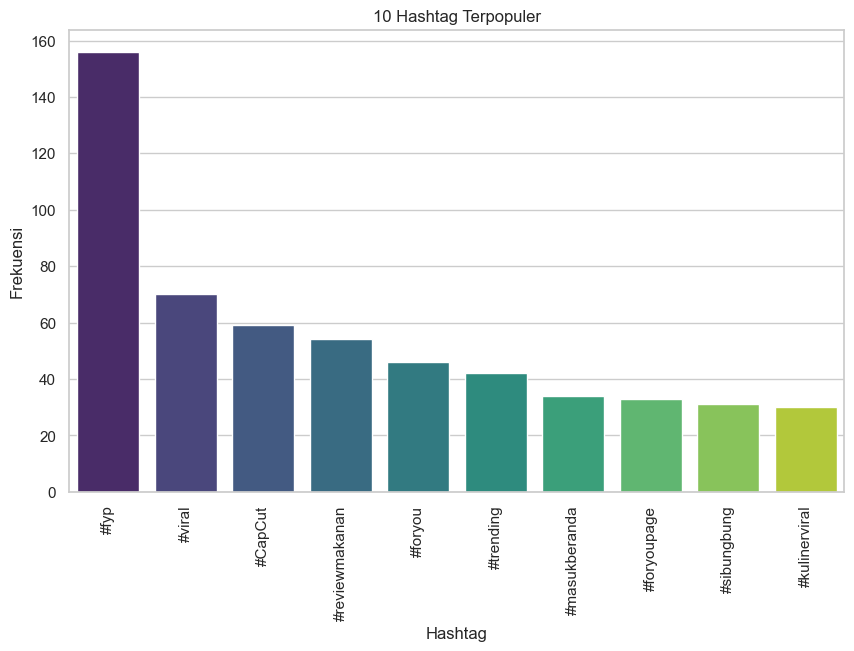

In [336]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hashtags.index, y=top_hashtags.values, palette='viridis')
plt.title('10 Hashtag Terpopuler')
plt.xticks(rotation=90)
plt.xlabel('Hashtag')
plt.ylabel('Frekuensi')
plt.show()

Model Popularitas Algoritma Random Forest

I. Model Training & Evaluation

In [337]:
features = hstack((
    TfidfVectorizer(max_features=100).fit_transform(df['text']),
    np.array(df[['authorMeta.name_encoded', 'musicMeta.musicName_encoded', 
                  'videoMeta.duration', 'hour', 'minute', 'second', 'text_length']])
))
X = features
y = df['is_popular']

In [338]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [339]:
#Training the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [340]:
# Predictions and Evaluation
y_pred = model.predict(X_test)

In [341]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying Metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
print(pd.DataFrame(report).T.round(2))

Accuracy: 0.82
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
              precision  recall  f1-score  support
0                  0.75    0.75      0.75    24.00
1                  0.86    0.86      0.86    43.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.81    0.81      0.81    67.00
weighted avg       0.82    0.82      0.82    67.00


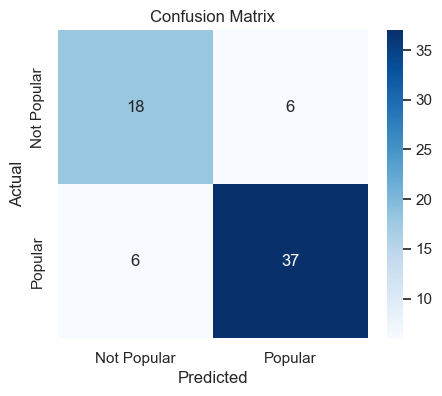

In [342]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [343]:
# Simpan model dan encoder
joblib.dump(model, 'model/rf_model.pkl')
joblib.dump(le_name, 'model/le_name.pkl')
joblib.dump(le_music, 'model/le_music.pkl')
joblib.dump(tfidf, 'model/tfidf_hashtag.pkl')

['model/tfidf_hashtag.pkl']